In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tracks=pd.read_csv(r"G:\Data Science\spotify\tracks.csv")
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# Check null values

pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [6]:
# summary statistics
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [7]:
#df_tracks["release_date"]=df_tracks["release_date",inplace=True]
#year= ""
#for char in df_tracks["release_date"]:
#    if char.isdigit():
#        first_four_digits += char
#    else:
#        break
       

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1579935504.py, line 1)

In [14]:
# To check least popular 10 song 

Least_Popular=df_tracks.sort_values('popularity',ascending=True).head(10)
Least_Popular

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [15]:
# Least popular songs are not in english lauguage.  

In [16]:
# To check Most popular 10 song 

Most_Popular=df_tracks.sort_values('popularity',ascending=False).head(10)
Most_Popular

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [17]:
# peaches is the most popular song in 2021 which has 100 popularity.

In [18]:
Most_Popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False).head(10)
Most_Popular

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


In [27]:
# Convert Track duration millisecond to second 

df_tracks["duration"]=df_tracks["duration_ms"].apply(lambda x:round(x/1000))
df_tracks.drop("duration_ms",inplace=True,axis=1)

In [28]:
df_tracks.head(10)

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dates,years,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,...,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922-01-01,1922,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,...,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922-01-01,1922,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,...,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922-01-01,1922,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,...,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922-01-01,1922,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,...,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922-01-01,1922,163
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,...,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1922-01-01,1922,179
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,...,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1922-01-01,1922,134
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,...,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1922-01-01,1922,161
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,...,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1922-01-01,1922,310
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.548,0.0391,6,...,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1922-01-01,1922,181


In [29]:
# Big duration 
Max_time=df_tracks.sort_values('duration',ascending=False).head(1)
Max_time

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dates,years,duration
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],1979,0.638,0.537,8,...,0.775,0.825,0.0,0.345,0.401,131.446,3,1979-01-01,1979,5621


In [22]:
df_tracks['duration'].max()

5621

#maximum duration of the track is 5621 sec has 3 popularity 

In [23]:
Min_time=df_tracks.sort_values('duration',ascending=True).head(1)
Min_time

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
1575,4WeyR22Ax2fF9dY0NxgjFV,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


In [24]:
Min=df_tracks['duration'].min()
Min

3

In [25]:
#Minimum duration of the track is 3 sec sang by Louis Armstrong has 0 popularity 

In [26]:
# who has the most monthly listners on spotify 


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'release_date'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'dates'),
 Text(13.5, 0, 'years'),
 Text(14.5, 0, 'duration')]

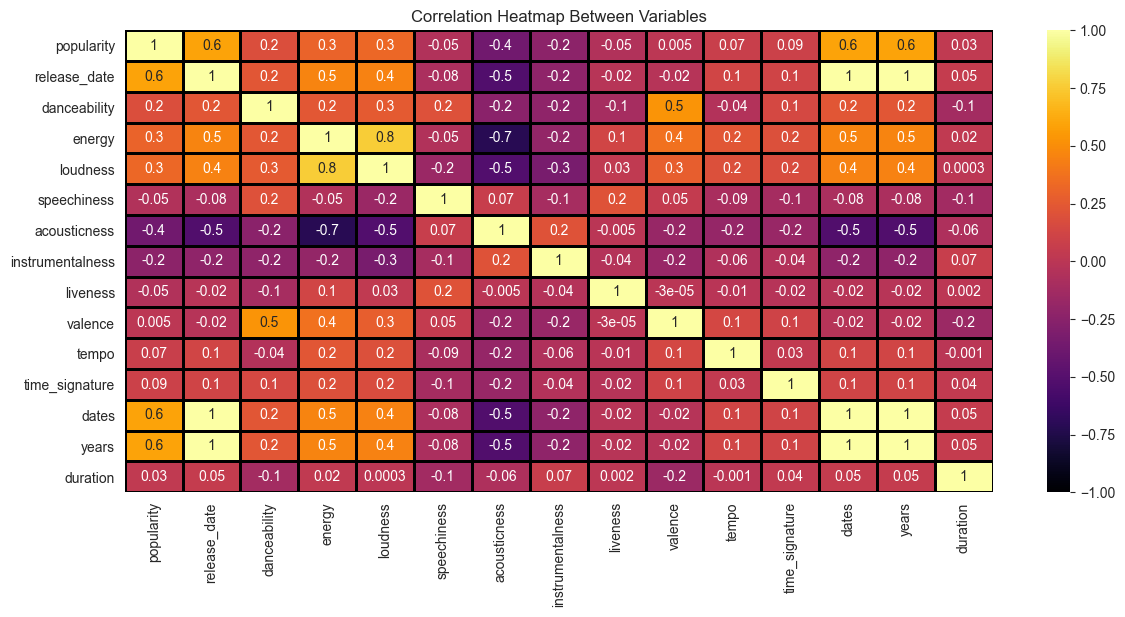

In [38]:
corr_df = df_tracks.drop(["key", "mode", "explicit","id","id_artists","name","artists"], axis=1).corr(method="pearson")

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [ ]:
# "acousticness have strong positive correlation with energy and loundness. There is a strong negative correlation 
# between energy and acousticness. There is moderately strong positive correlation between danceability and valence and loudness.
# There is a moderately strong negative correlation between loudness and acousticness. 

In [31]:
Sample_df=df_tracks.sample(int(0.004*len(df_tracks)))

In [32]:
print(len(Sample_df))

2346


[Text(0.5, 1.0, 'Loudness vs energy correlation plot')]

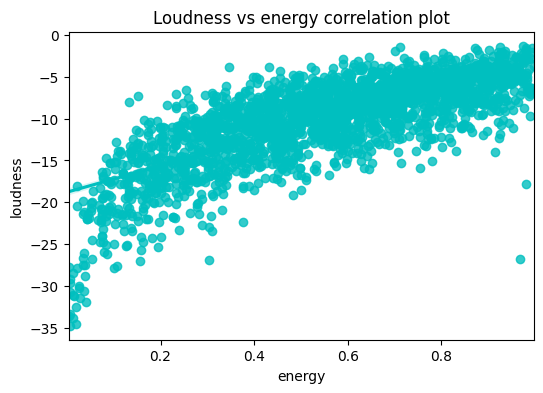

In [33]:
plt.figure(figsize=(6,4))
sns.regplot(data=Sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs energy correlation plot")

[Text(0.5, 1.0, 'Loudness vs acousticness correlation plot')]

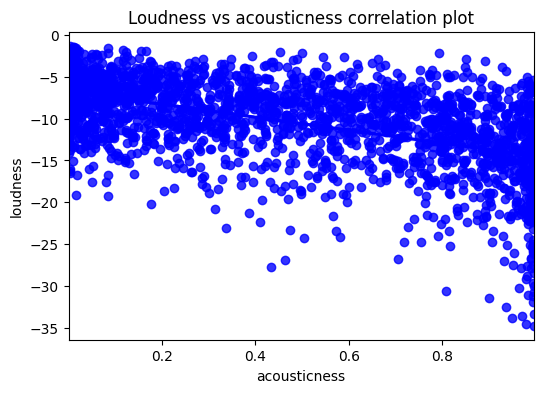

In [34]:
plt.figure(figsize=(6,4))
sns.regplot(data=Sample_df,y="loudness",x="acousticness",color="b").set(title="Loudness vs acousticness correlation plot")

[Text(0.5, 1.0, 'energy vs acoustcness corrlation plot')]

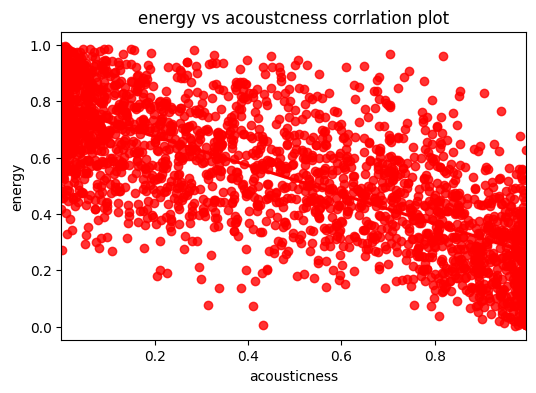

In [35]:
plt.figure(figsize=(6,4))
sns.regplot(data=Sample_df,y="energy", x="acousticness",color="r").set(title="energy vs acoustcness corrlation plot")

In [36]:
#pip install --user seaborn==0.11.0

In [52]:
df_tracks['release_date']=df_tracks['release_date'].str.extract('(\d+)')
df_tracks.head(10)

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,0,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,127,None
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,0,...,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,98,None
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,1,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,182,None
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,7,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,177,None
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,163,1922
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,...,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,179,1922
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,...,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,134,1922
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,...,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,161,1922
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,...,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,310,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.548,0.0391,6,...,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,181,None


In [13]:
df_tracks['release_date'] = df_tracks['release_date'].str[:4]

# Convert the 'release_date' column to datetime
df_tracks['dates'] = pd.to_datetime(df_tracks['release_date'], format='%Y', errors='coerce')
df_tracks['years'] = df_tracks['dates'].dt.year

In [16]:
df_tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dates,years
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922,0.645,0.4450,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922-01-01,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922,0.695,0.2630,...,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922-01-01,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.434,0.1770,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922-01-01,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.321,0.0946,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922-01-01,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922-01-01,1922
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,...,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1922-01-01,1922
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,...,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,1922-01-01,1922
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,...,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1922-01-01,1922
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,...,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,1922-01-01,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922,0.548,0.0391,...,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1922-01-01,1922


In [19]:
df_tracks['release_date'] = df_tracks['release_date'].str[:4]

# Convert the 'release_date' column to datetime
df_tracks['dates'] = pd.to_datetime(df_tracks['release_date'], format='%Y', errors='coerce')
years = df_tracks['dates'].dt.year

C:\Users\Shree\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


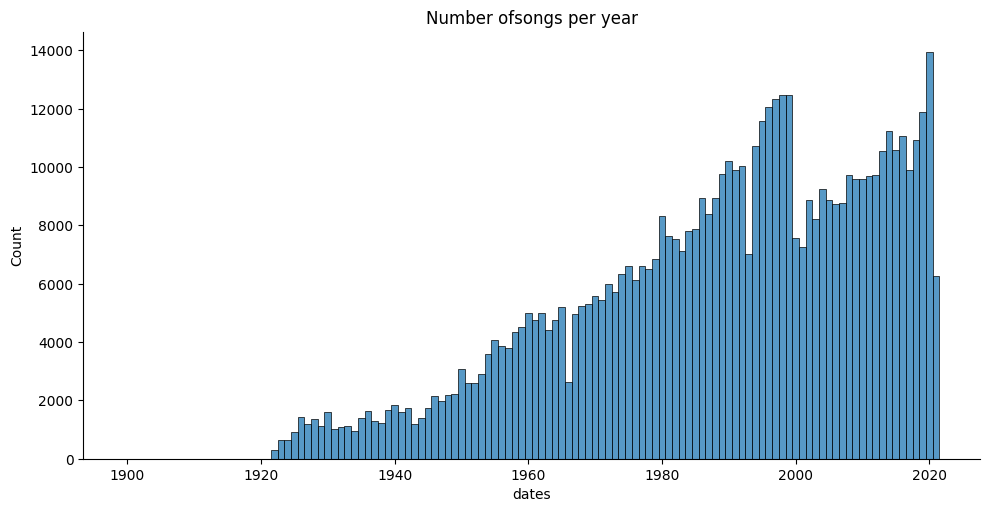

In [20]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Number ofsongs per year")

In [ ]:
# using histogram we observe that the number of songs releasing is increasing.In 2020 maximum nuber of songs is released.

In [26]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'dates', 'years'],
      dtype='object')

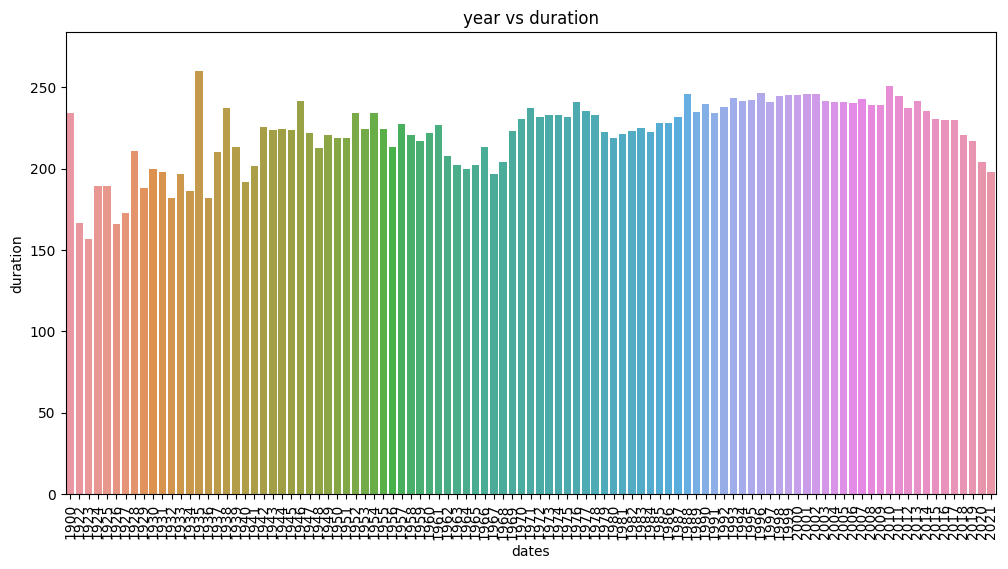

In [33]:
Total_Dr= df_tracks.duration
fig_dims=(18,7)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x=years,y=Total_Dr,ax=ax,errwidth=False)
plt.title("year vs duration")
plt.xticks(rotation=90)
plt.show()



In [ ]:
# duration of the songs is going decreases from 2010 

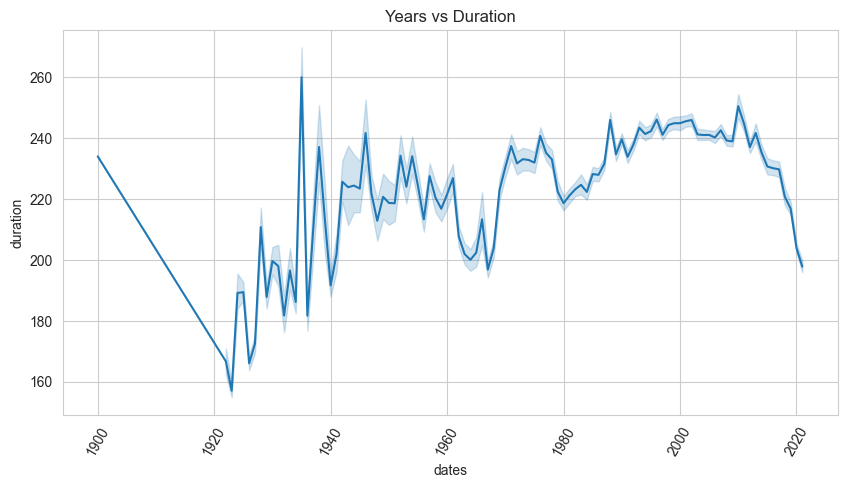

In [36]:
Total_Dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dim=(10,5)
fig,ax=plt.subplots(figsize=fig_dim)
sns.lineplot(x=years,y=Total_Dr,ax=ax)
plt.title("Years vs Duration")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# After 1960 duration of the songs is increasing until 2010. After 2010 it is constatly decreasing.